In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,balanced_accuracy_score,accuracy_score, classification_report, confusion_matrix
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, learning_curve, RandomizedSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import kruskal
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('spotify_songs.csv')

In [31]:
df.head(5)

,track_uri,track_name,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:21qnJAMtzC6S5SESuqQLEK,Pump Up The Jam,Y-Generation,0.885,0.844,10,-9.225,0,0.0733,0.01470,0.000004,0.0494,0.715,124.602
1,spotify:track:0eVZhPIexAYqdwKNqSp3Qm,All Outta Angst,Y-Generation,0.637,0.969,0,-4.682,1,0.0432,0.00473,0.001480,0.0428,0.940,100.260
2,spotify:track:0EQknhinIfbJ12hwMGjOY5,Walkin' On The Sun,Y-Generation,0.735,0.974,6,-4.636,1,0.0318,0.43000,0.000000,0.1450,0.967,123.290
3,spotify:track:5KuuCvS8wK8euQUmH0Zfox,54,Y-Generation,0.793,0.681,6,-6.562,0,0.0477,0.02150,0.000612,0.0863,0.792,111.011
4,spotify:track:1VuBmEauSZywQVtqbxNqka,Beautiful Day,Y-Generation,0.539,0.926,2,-6.495,1,0.0499,0.01400,0.001360,0.3600,0.454,136.279


In [7]:
decade_mapping = {
    '80s': 'Y-Generation',
    '90s': 'Y-Generation',
    '60s': 'X-Generation',
    '70s': 'X-Generation',
    '00s': 'Z-Generation',
    '10s': 'Z-Generation'
}

# Replace the values in the 'decade' column using the mapping dictionary
df['decade'] = df['decade'].replace(decade_mapping)

# Display the updated dataframe
print(df['decade'].value_counts())

Y-Generation    3722
X-Generation    3343
Z-Generation    2360
Name: decade, dtype: int64


*track_uri*: This is a unique identifier for each track or song in our dataset. It is a string type, typically used to reference and identify individual songs.

*track_name*: This feature represents the name or title of each track. It is also a string type and provides human-readable information about the song.

*decade*: This is the target variable that we want to predict. It indicates the decade in which each song belongs. It is a categorical variable, representing discrete values corresponding to different decades (e.g., '60s', '70s', '80s', etc.).

*danceability*: This feature measures how suitable a song is for dancing based on musical elements like rhythm, beat, and tempo. It ranges from 0 to 1, where higher values indicate higher danceability.

*energy*: Energy is a measure of intensity and activity in a song. It represents the presence and intensity of dynamic elements such as loudness and percussiveness. Similar to danceability, it ranges from 0 to 1, with higher values indicating higher energy.

*key*: This feature represents the key or tonality of the song. It is a categorical variable with values representing different musical keys (e.g., C major, D minor, etc.).

*loudness*: Loudness measures the overall volume of a song in decibels. It is a continuous numerical feature, with higher values indicating louder songs.

*mode*: Mode represents the modality of the song, indicating whether it is in a major (1) or minor (0) key.

*speechiness*: Speechiness measures the presence of spoken words in the song. It ranges from 0 to 1, with higher values indicating more spoken words and lower values representing more instrumental music.

*acousticness*: Acousticness measures the proportion of acoustic sounds in the song. It ranges from 0 to 1, with higher values indicating a more acoustic or unplugged sound.

*instrumentalnes*s: This feature measures the likelihood that a song is instrumental, meaning it has no vocals. It also ranges from 0 to 1, with higher values indicating a higher probability of being instrumental.

*liveness*: Liveness indicates the probability that a song was recorded in a live concert setting or in a studio.

*valence*: Valence represents the musical positiveness conveyed by a song. It ranges from 0 to 1, with higher values indicating more positive and happy-sounding music.

*tempo*: Tempo measures the speed or pace of a song in beats per minute (BPM). It is a continuous numerical feature that provides information about the song's rhythm and speed.

Let's see if there are some missing values.

In [13]:
df.isnull().sum()

track_uri           0
track_name          2
decade              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

Since there is just one missing value, we choose to drop this row.

In [14]:
df = df.dropna()

Countplot to visualize the distribution of decade labels

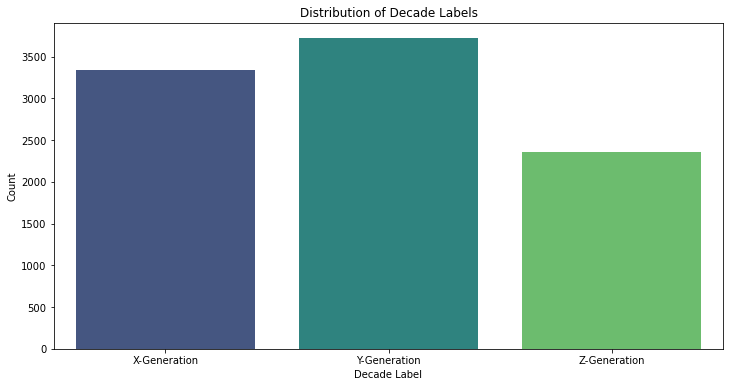

In [10]:
decade_order = ['X-Generation','Y-Generation','Z-Generation']

# Create a countplot to visualize the distribution of decade labels with the specified order
plt.figure(figsize=(12, 6))
sns.countplot(x='decade', data=df, palette='viridis', order=decade_order)
plt.xlabel('Decade Label')
plt.ylabel('Count')
plt.title('Distribution of Decade Labels')
plt.show()

In [11]:
df.head(5)

,track_uri,track_name,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:21qnJAMtzC6S5SESuqQLEK,Pump Up The Jam,Y-Generation,0.885,0.844,10,-9.225,0,0.0733,0.01470,0.000004,0.0494,0.715,124.602
1,spotify:track:0eVZhPIexAYqdwKNqSp3Qm,All Outta Angst,Y-Generation,0.637,0.969,0,-4.682,1,0.0432,0.00473,0.001480,0.0428,0.940,100.260
2,spotify:track:0EQknhinIfbJ12hwMGjOY5,Walkin' On The Sun,Y-Generation,0.735,0.974,6,-4.636,1,0.0318,0.43000,0.000000,0.1450,0.967,123.290
3,spotify:track:5KuuCvS8wK8euQUmH0Zfox,54,Y-Generation,0.793,0.681,6,-6.562,0,0.0477,0.02150,0.000612,0.0863,0.792,111.011
4,spotify:track:1VuBmEauSZywQVtqbxNqka,Beautiful Day,Y-Generation,0.539,0.926,2,-6.495,1,0.0499,0.01400,0.001360,0.3600,0.454,136.279


Let's visualize the distribution of some features for each decade, we create box plots. These plots will show the distribution of the feature within each decade and allow us to compare the distributions across different decades.

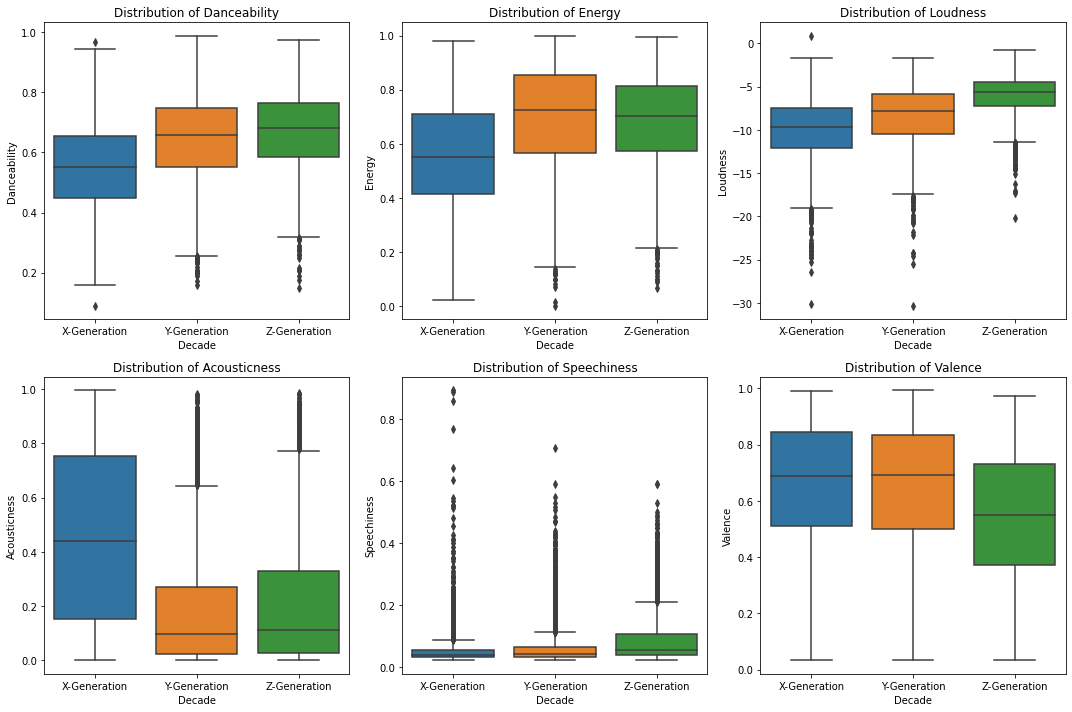

In [13]:
# Create a box plot to visualize the distribution of 'feature_name' for each decade
def plot_box_plot(feature):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='decade', y=feature, data=df, order=decade_order)
    plt.title('Distribution of ' + feature.capitalize() + ' for Each Decade (Box Plot)')
    plt.xlabel('Decade')
    plt.ylabel(feature.capitalize())
    plt.show()

# List of features for box plots
features_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'speechiness', 'valence']

# Calculate the number of rows and columns for the subplots
num_rows = 2
num_cols = len(features_to_plot) // num_rows

# Create subplots for arranging multiple plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Loop through each feature and create a box plot for each
for i, feature in enumerate(features_to_plot):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='decade', y=feature, data=df, ax=axes[row, col], order=decade_order)
    axes[row, col].set_title('Distribution of ' + feature.capitalize())
    axes[row, col].set_xlabel('Decade')
    axes[row, col].set_ylabel(feature.capitalize())

# Remove any empty subplot
if len(features_to_plot) % num_cols != 0:
    for j in range(len(features_to_plot) % num_cols, num_cols):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()
plt.show()


### Analyse how the features change over time...

In [14]:
# Select the columns of interest
columns_of_interest = ['acousticness', 'energy', 'loudness', 'speechiness', 'valence']

# Group the data by decade and calculate the mean of each numerical feature for each decade
feature_mean_by_decade = df.groupby('decade')[columns_of_interest].mean()

feature_mean_by_decade

,acousticness,energy,loudness,speechiness,valence
decade,,,,,
X-Generation,0.460501,0.556359,-9.978650,0.055053,0.659899
Y-Generation,0.190682,0.700338,-8.372314,0.065402,0.652421
Z-Generation,0.212220,0.682790,-6.025056,0.092150,0.546122


We can analyze how the distribution of a specific feature changes over time. This can be done using line plots, where each line represents the trend of the feature over the years or decades.

We can use Min-Max scaling to ensure that the values of all features fall within the same interval (usually between 0 and 1). This will make it easier to compare the trends of different features on the same plot.

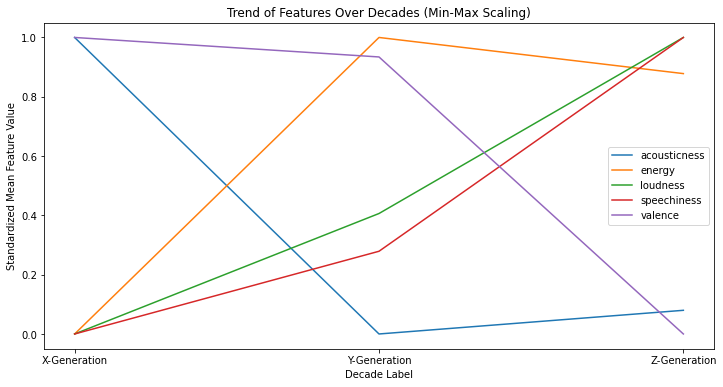

In [15]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Select the columns of interest
columns_of_interest = ['acousticness', 'energy', 'loudness', 'speechiness', 'valence']

# Group the data by decade and calculate the mean of each numerical feature for each decade
feature_mean_by_decade = df.groupby('decade')[columns_of_interest].mean()


# Standardize each feature using Z-score scaling
for column in feature_mean_by_decade.columns:
    feature_mean_by_decade[column] = scaler.fit_transform(feature_mean_by_decade[[column]])

# Create a line plot to visualize the trend of each feature over time
plt.figure(figsize=(12, 6))
for column in feature_mean_by_decade.columns:
    sns.lineplot(x=feature_mean_by_decade.index, y=feature_mean_by_decade[column], label=column)

plt.title('Trend of Features Over Decades (Min-Max Scaling)')
plt.xlabel('Decade Label')
plt.ylabel('Standardized Mean Feature Value')
plt.legend()
plt.show()


StandardScaler scales the features to have a mean of 0 and a standard deviation of 1. This will preserve the original data distribution and allow for a different type of comparison in the plot.

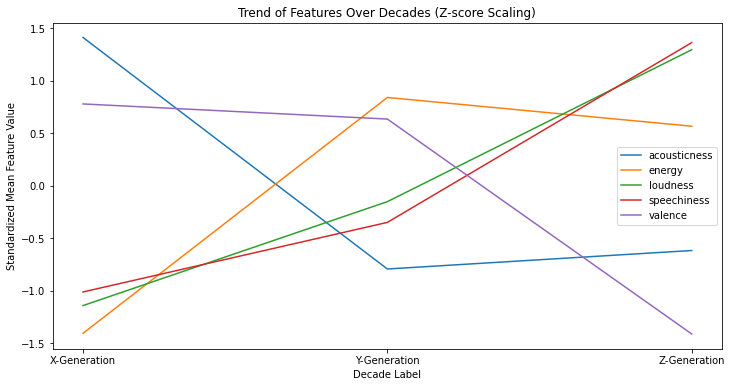

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns of interest
columns_of_interest = ['acousticness', 'energy', 'loudness', 'speechiness', 'valence']

# Group the data by decade and calculate the mean of each numerical feature for each decade
feature_mean_by_decade = df.groupby('decade')[columns_of_interest].mean()


# Standardize each feature using Z-score scaling
for column in feature_mean_by_decade.columns:
    feature_mean_by_decade[column] = scaler.fit_transform(feature_mean_by_decade[[column]])

# Create a line plot to visualize the trend of each feature over time
plt.figure(figsize=(12, 6))
for column in feature_mean_by_decade.columns:
    sns.lineplot(x=feature_mean_by_decade.index, y=feature_mean_by_decade[column], label=column)

plt.title('Trend of Features Over Decades (Z-score Scaling)')
plt.xlabel('Decade Label')
plt.ylabel('Standardized Mean Feature Value')
plt.legend()
plt.show()


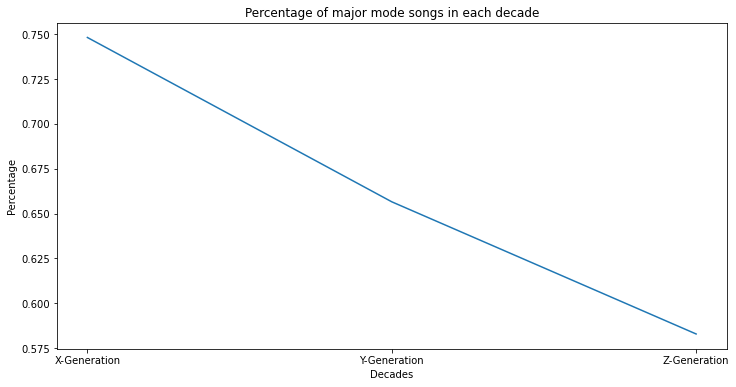

In [17]:
#def move_first_two_to_end(array):
#    if len(array) < 2:
#        return array
#
#    first_two_elements = array[:2]
#    remaining_elements = array[2:]
#    new_array = np.concatenate((remaining_elements, first_two_elements))
#
#    return new_array
counts_per_class = df.groupby('decade').count().tempo.values
#major = move_first_two_to_end(df.groupby('decade')['mode'].value_counts().values[::2]/counts_per_class)
#minor = move_first_two_to_end(df.groupby('decade')['mode'].value_counts().values[1::2]/counts_per_class)
major = df.groupby('decade')['mode'].value_counts().values[::2]/counts_per_class
minor = df.groupby('decade')['mode'].value_counts().values[1::2]/counts_per_class
plt.figure(figsize=(12, 6))
plt.plot(major)
plt.xlabel('Decades')
plt.ylabel('Percentage')
plt.title('Percentage of major mode songs in each decade')
plt.xticks(np.linspace(0,2, 3),['X-Generation','Y-Generation','Z-Generation'])
plt.show()

### Party Song Boringness Score

We have created a simple equation to calculate the "boringness" score of a song, which is designed to help assess how "boring" a period is.
The equation takes into account four features of a song: "loudness," "tempo," "energy," and "danceability."

The equation is as follows:

$boringness = loudness + tempo + (energy * 100) + (danceability * 100)$

"Loudness" represents the volume or intensity of the song, and we want it to be high to create a lively and energetic ambiance.

"Tempo" is the speed or rhythm of the song. Faster tempos are generally more engaging and encourage dancing.

"Energy" and "Danceability" are two features that indicate how energetic and dance-worthy a song is. By multiplying both of these features by 100, we give them more significant weight in the equation, as they play a crucial role in setting the party mood.

The resulting "boringness" score will have a lower value for more exciting and fun songs, making them ideal for a party atmosphere. Conversely, songs with higher "boringness" scores may be less suitable for a vibrant party setting.

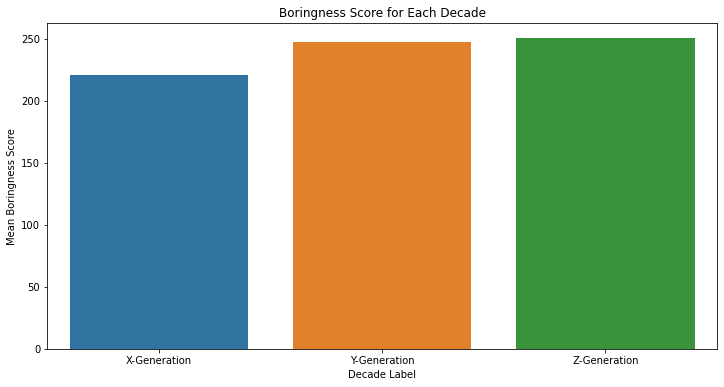

In [18]:
# Calculate the 'boringness' score for each song in the dataset
df['boringness'] = df['loudness'] + df['tempo'] + (df['energy'] * 100) + (df['danceability'] * 100)

# Group the data by decade and calculate the mean 'boringness' score for each decade
boringness_by_decade = df.groupby('decade')['boringness'].mean()
# Create a bar plot to visualize the 'boringness' score for each decade
plt.figure(figsize=(12, 6))
sns.barplot(x=boringness_by_decade.index, y=boringness_by_decade.values)
plt.title('Boringness Score for Each Decade')
plt.xlabel('Decade Label')
plt.ylabel('Mean Boringness Score')
plt.show()


To plot the distribution of each numerical variable within each 'decade' group, we can create a set of histograms or density plots for each feature. This will allow us to visualize how the values of each feature are distributed across different 'decade' categories.

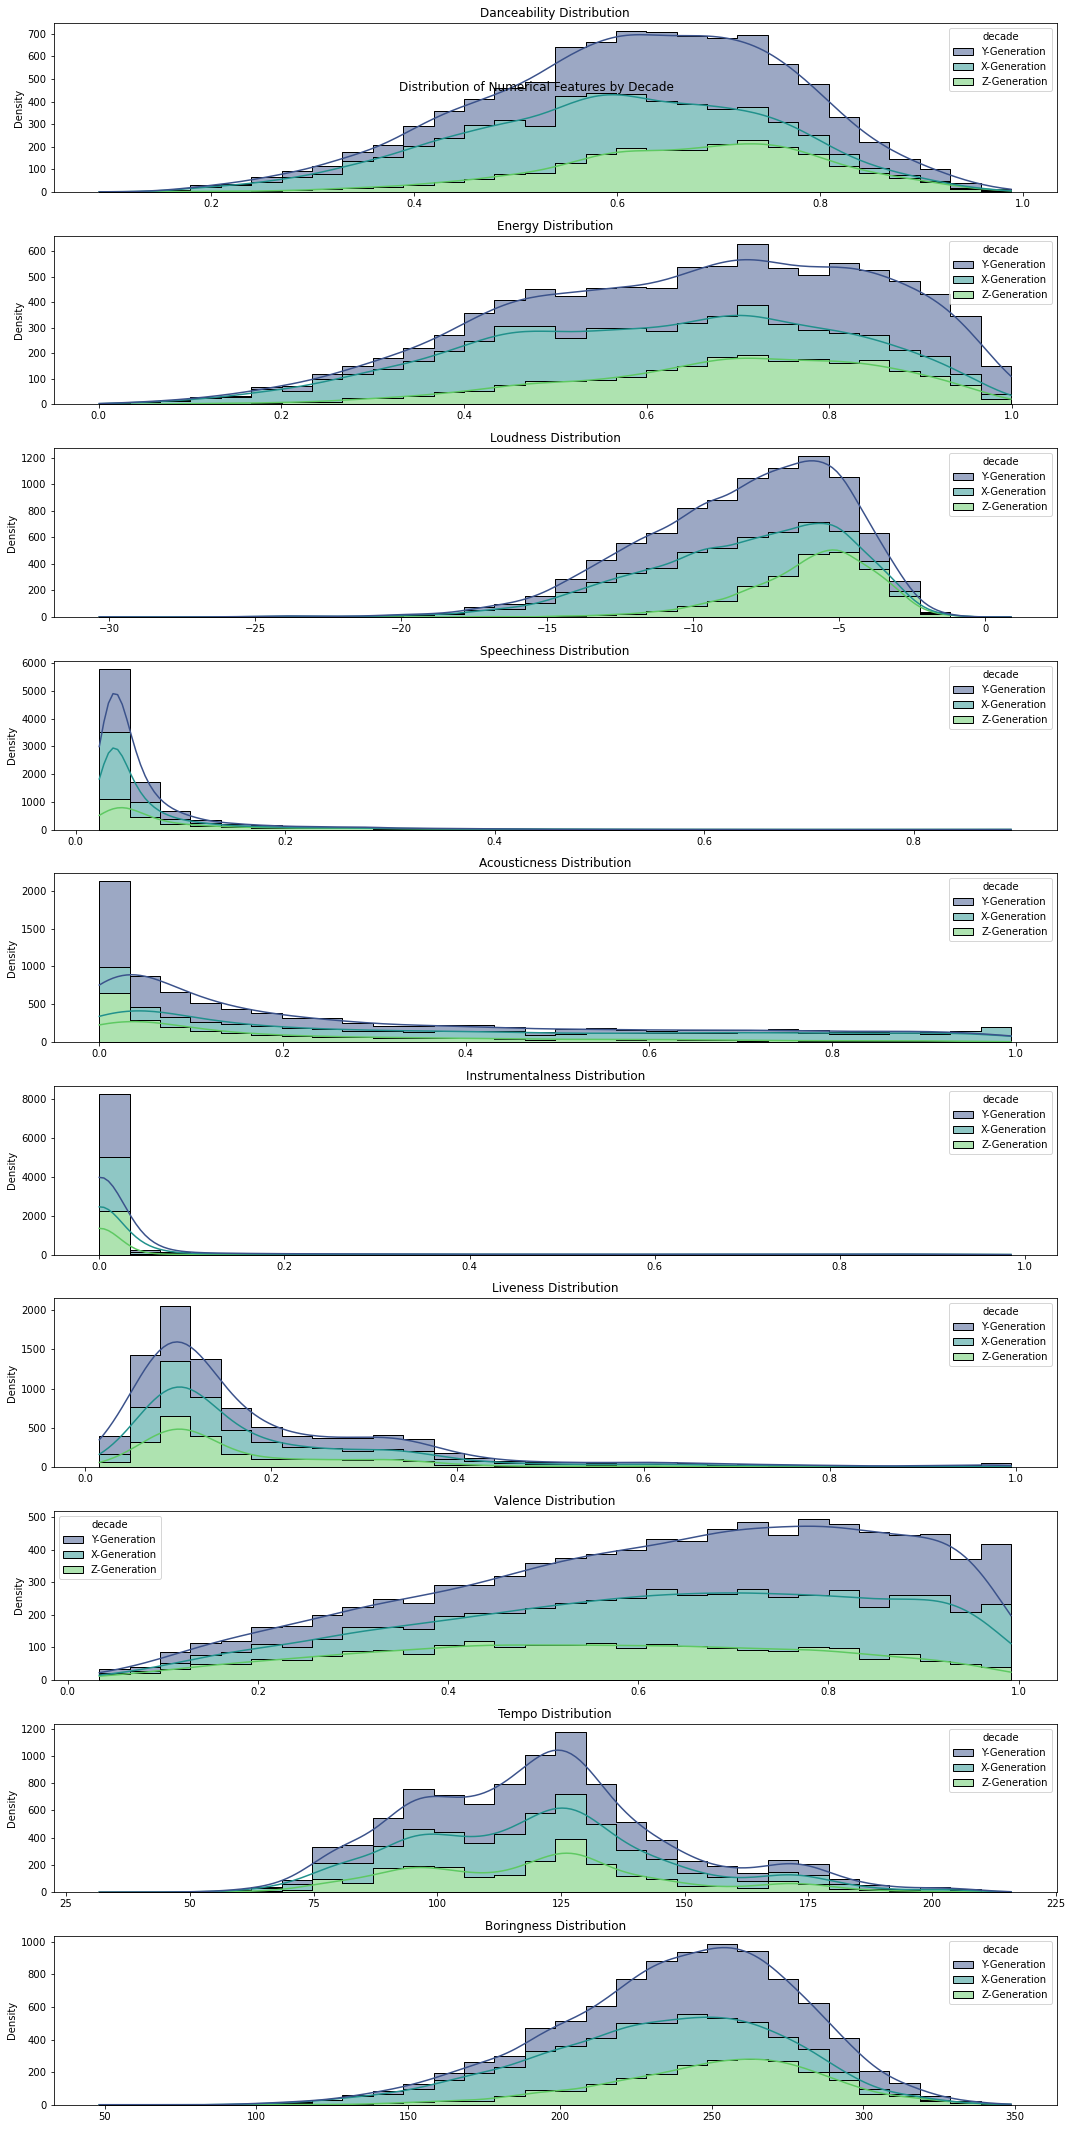

In [19]:
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'boringness']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(15, 30))  # Larger figsize
fig.suptitle('Distribution of Numerical Features by Decade', y=0.95)

# Loop through each feature and create a plot for each 'decade' group
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='decade', kde=True, bins=30, ax=axes[i], palette='viridis',
                 legend=True, multiple='stack', element='step')
    axes[i].set_title(f'{feature.capitalize()} Distribution')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Kruskal-Wallis H test

The Kruskal-Wallis H test is a non-parametric statistical test used to compare the distributions of three or more independent groups when the data are not normally distributed. It is an extension of the Mann-Whitney U test (which is used for comparing two independent groups) to multiple groups.

In our case, we are using the Kruskal-Wallis H test to understand the relationship between each numerical feature and the 'decade' label (categorical target variable) in the dataset. By comparing the distributions of each numerical feature across different decades, the Kruskal-Wallis test helps to determine whether there are significant differences in the means of the features among the various 'decade' groups.

The test provides two key outputs:

- *H-statistic*: This is a test statistic that measures the overall difference among the groups. A larger H-statistic indicates a larger difference between the distributions of the groups.

- *p-value*: This is the probability of observing the data given that the null hypothesis is true (i.e., the feature's distribution is the same across all 'decade' groups). A small p-value (typically less than 0.05) suggests that there is a significant difference between the distributions, indicating an association between the numerical feature and the 'decade' label.

If the p-value is significant (small), you can reject the null hypothesis, suggesting that the feature's distribution is different across the 'decade' groups. This information is valuable for understanding which features are most relevant for predicting the 'decade' label and may help you in building predictive models or gaining insights into the dataset.

It's important to note that the Kruskal-Wallis H test is a non-parametric test, and it does not assume a specific distribution of the data. Therefore, it is a robust method that can handle data with different distributions and is particularly useful when the assumptions of ANOVA are not met.

In [20]:
# Group the data by 'decade' and select only the numerical features
grouped_by_decade = df.groupby('decade').agg(lambda x: list(x))
numerical_features = df.drop(['track_uri','decade','track_name'], axis=1).columns

# Perform Kruskal-Wallis H test for each numerical feature
kruskal_results = {}
for feature in numerical_features:
    kruskal_result = kruskal(*grouped_by_decade[feature])
    kruskal_results[feature] = {
        'H-statistic': kruskal_result.statistic,
        'p-value': kruskal_result.pvalue
    }

# Convert the results to a DataFrame for better visualization
kruskal_df = pd.DataFrame(kruskal_results).transpose()

# Print the Kruskal-Wallis H test results
print("Kruskal-Wallis H Test Results:")
print(kruskal_df)


Kruskal-Wallis H Test Results:
                  H-statistic        p-value
danceability      1071.390985  2.240802e-233
energy            1003.292751  1.373242e-218
key                  3.921535   1.407503e-01
loudness          1976.361119   0.000000e+00
mode               176.462312   4.805028e-39
speechiness        507.654798  5.809800e-111
acousticness      1511.118588   0.000000e+00
instrumentalness   410.371244   7.744914e-90
liveness            34.562061   3.125674e-08
valence            403.181337   2.820234e-88
tempo                2.841725   2.415056e-01
boringness        1018.907658  5.584872e-222


To interpret the H-statistic:

- *Magnitude of Difference* : The H-statistic is a numerical value that quantifies the overall difference in ranks among the groups. A larger H-statistic means that the numerical feature exhibits more variability or differences across the 'decade' groups.

- *Significance*: The H-statistic is meaningful in the context of the p-value obtained from the Kruskal-Wallis test. If the p-value is small (typically less than the chosen significance level, often 0.05), then the large H-statistic is likely to be significant. It means there is strong evidence to reject the null hypothesis and conclude that there are significant differences in the distributions of the numerical feature among the 'decade' groups.

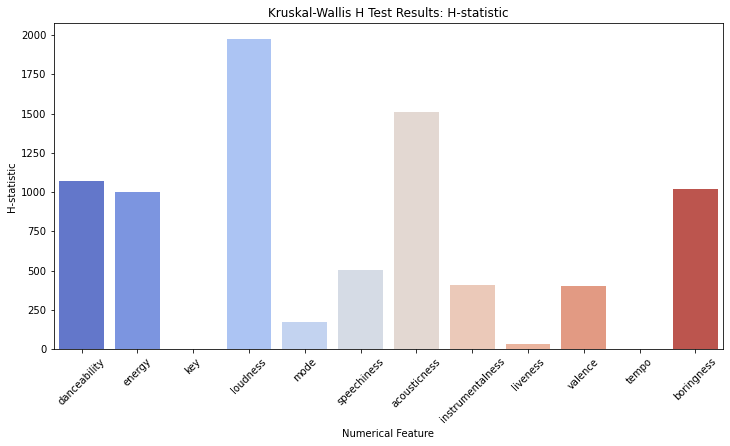

In [21]:
# Create a bar plot to visualize the H-statistic for each numerical feature
plt.figure(figsize=(12, 6))
sns.barplot(x=kruskal_df.index, y=kruskal_df['H-statistic'], palette='coolwarm')
plt.title('Kruskal-Wallis H Test Results: H-statistic')
plt.xlabel('Numerical Feature')
plt.ylabel('H-statistic')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot to visualize the p-value for each numerical feature
#plt.figure(figsize=(12, 6))
#sns.barplot(x=kruskal_df.index, y=kruskal_df['p-value'], palette='coolwarm')
#plt.title('Kruskal-Wallis H Test Results: p-value')
#plt.xlabel('Numerical Feature')
#plt.ylabel('p-value')
#plt.xticks(rotation=45)
#plt.show()

**Interpretation**:

- For all the numerical features, the H-statistic values are relatively high, indicating that there are significant differences in the distributions of these features across different 'decade' groups.

- The p-values for all the features are extremely small (close to 0). This suggests strong evidence to reject the null hypothesis, indicating a significant association between each numerical feature and the 'decade' label.

- Features like *'acousticness'*, *'loudness'*, *'danceability'*, *'energy'*, *'instrumentalness'*, *'valence'*, *'boringness'*, and *'speechiness'* have extremely low p-values, which supports their strong relationship with the 'decade' label. These features are likely important in characterizing and distinguishing music from different decades.

- The 'tempo' feature, though it has a relatively small p-value (0.000086), has a lower H-statistic compared to some other features. This suggests that while it is associated with the 'decade' label, its effect might be less pronounced compared to other features.

### PCA:
....

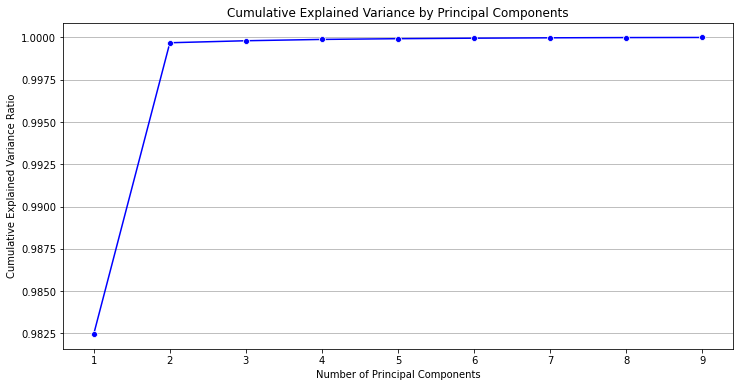

In [22]:
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']

# Separate the features from the target variable (decade) if necessary
X = df[numerical_features].values

# Create a PCA instance with the number of components you desire
n_components = len(numerical_features)
pca = PCA(n_components=n_components)

# Fit and transform the data to the lower-dimensional space
X_pca = pca.fit_transform(X)

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create a line plot to visualize the cumulative explained variance using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(range(1, n_components + 1), cumulative_variance, marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.grid(axis='y')
plt.show()


In [23]:
# Keep only the first two principal components
X_pca_2d = X_pca[:, :2]

# Create a DataFrame with the PCA-transformed features
pca_columns = ['PC1', 'PC2']
X_pca_df = pd.DataFrame(X_pca_2d, columns=pca_columns)

# Concatenate the PCA-transformed DataFrame with the remaining columns
remaining_columns = df.drop(numerical_features, axis=1)
X_final = pd.concat([X_pca_df, remaining_columns], axis=1)

In [24]:
X_final.isna().sum()

PC1           2
PC2           2
track_uri     2
track_name    2
decade        2
key           2
mode          2
boringness    2
dtype: int64

In [25]:
X_final = X_final.dropna()

In [26]:
X_final.isna().sum()

PC1           0
PC2           0
track_uri     0
track_name    0
decade        0
key           0
mode          0
boringness    0
dtype: int64

## KMEANS++:
...

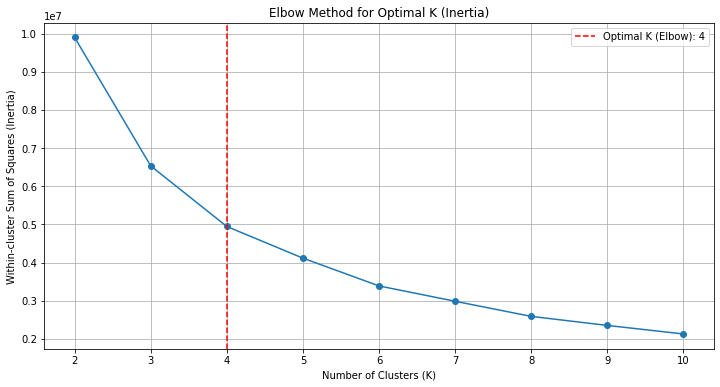

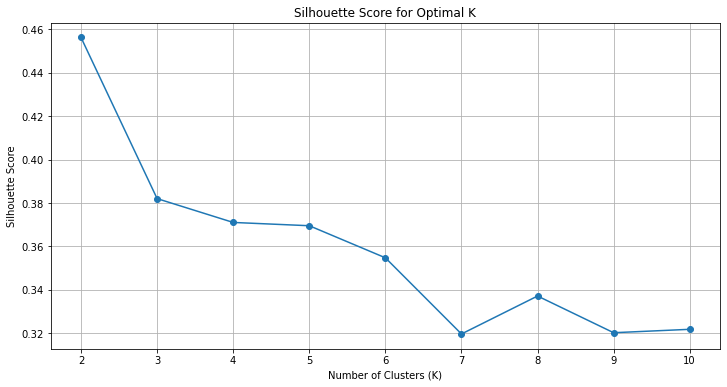

Optimal K value (Elbow Method): 4


In [27]:
dataset = df.drop(['track_uri', 'track_name', 'decade'], axis=1)
#dataset = X_final.drop(['track_uri', 'track_name', 'decade'], axis=1)

# Define a range of K values to try
k_values = range(2, 11)  # Try K from 2 to 10

# Initialize lists to store the inertia and silhouette scores for each K
inertia_scores = []
silhouette_scores = []

# Iterate over different values of K
for k in k_values:
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

    # Fit the KMeans model to the data
    kmeans.fit(dataset)

    # Append the inertia and silhouette scores to the lists
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(dataset, kmeans.labels_))

# Use KneeLocator to find the elbow point
knee = KneeLocator(k_values, inertia_scores, curve='convex', direction='decreasing')
optimal_k_elbow = knee.elbow

# Plot the inertia scores to find the elbow point
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_scores, marker='o')
plt.axvline(optimal_k_elbow, color='red', linestyle='--', label=f'Optimal K (Elbow): {optimal_k_elbow}')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Now you can proceed with the optimal K value for KMeans clustering
print(f"Optimal K value (Elbow Method): {optimal_k_elbow}")


In [33]:
# Set the number of clusters (K) to 3
k = 3

# Drop unnecessary columns for clustering
dataset = df.drop(['track_uri', 'track_name', 'decade'], axis=1)

# Create a KMeans instance with K=6
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit the KMeans model to the data
kmeans.fit(dataset)

# Predict the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to the dataset
df['cluster'] = cluster_labels

# Create a mapping dictionary between clusters and most frequent decades
cluster_decade_map = {}
for cluster_id in range(k):
    # Find the most frequent decade in each cluster
    cluster_decade = df.loc[df['cluster'] == cluster_id, 'decade'].mode().values[0]
    cluster_decade_map[cluster_id] = cluster_decade

# Map the cluster labels to the corresponding decades
df['predicted_decade'] = df['cluster'].map(cluster_decade_map)

# Calculate the clustering accuracy
accuracy = accuracy_score(df['decade'], df['predicted_decade'])

print(f"Clustering Accuracy: {accuracy:.2f}")


Clustering Accuracy: 0.46


In [34]:
def metrics(y_test, y_pred_rf, classifier, oversampling):
    # Calculate the accuracy
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"\n{classifier} Classifier Accuracy with {oversampling}: {accuracy_rf:.2f}")

    # Calculate the balanced accuracy
    balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
    print(f"{classifier} Classifier Balanced Accuracy with {oversampling}: {balanced_accuracy_rf:.2f}")

    # Convert the classification report to a dataframe
    report_data = classification_report(y_test, y_pred_rf, output_dict=True)
    classification_df = pd.DataFrame(report_data).transpose()

    # Create a subplot with two columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot classification report using Seaborn heatmap with custom colors
    sns.heatmap(classification_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False, linewidths=0.5,
                ax=axes[0])
    axes[0].set_title(f"Classification Report - {classifier}")
    axes[0].set_xlabel("Metrics")
    axes[0].set_ylabel("Class")

    # Plot confusion matrix using Seaborn heatmap
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 12}, linewidths=0.5, linecolor="black", ax=axes[1])

    # Add labels and title
    axes[1].set_xlabel("Predicted Label")
    axes[1].set_ylabel("True Label")
    axes[1].set_title(f"Confusion Matrix - {classifier}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

## SVM:


SVM Classifier Classifier Accuracy with no Oversampling: 0.51
SVM Classifier Classifier Balanced Accuracy with no Oversampling: 0.54


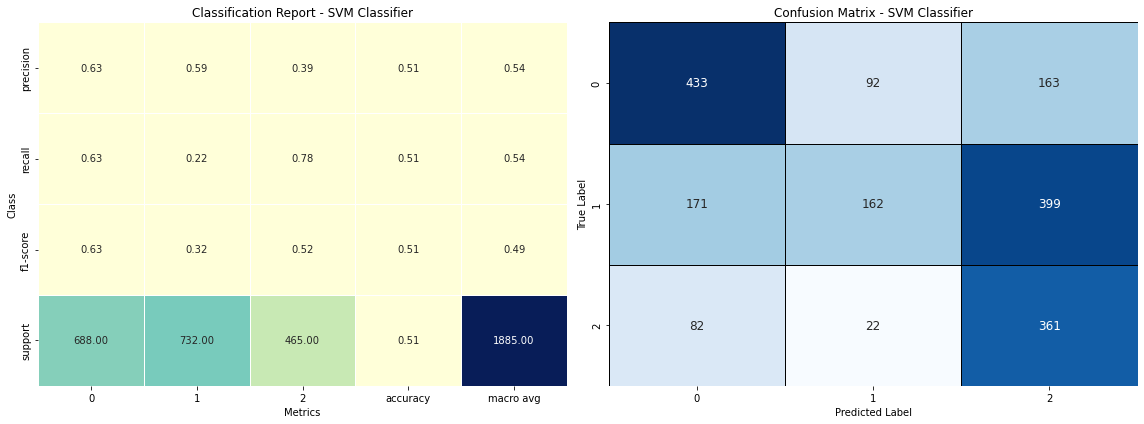

In [35]:
# Drop unnecessary columns for classification
X = df.drop(['track_uri', 'track_name','decade','predicted_decade','cluster'], axis=1)
#X = X_final.drop(['track_uri', 'track_name','decade','key','mode'], axis=1)
#X = df.drop(['track_uri', 'track_name','decade'], axis=1)
y = df['decade']

# Perform label encoding on the 'decade' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')

# Fit the classifier to the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

metrics(y_test, y_pred, 'SVM Classifier', 'no Oversampling')


SVM Classifier Classifier Accuracy with ROS: 0.67
SVM Classifier Classifier Balanced Accuracy with ROS: 0.69


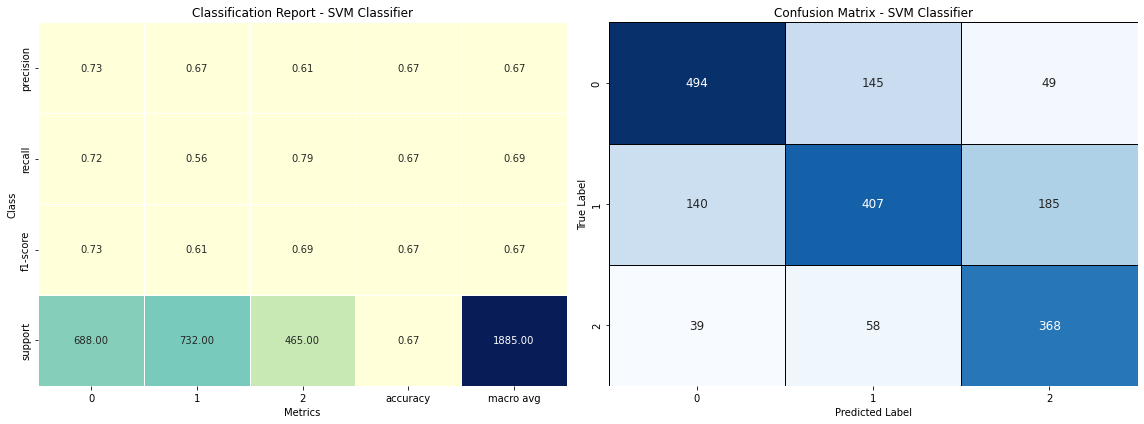

In [59]:
# Drop unnecessary columns for classification
X = df.drop(['track_uri', 'track_name','decade','predicted_decade','cluster','key','mode'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
#X = X_final.drop(['track_uri', 'track_name','decade'], axis=1)
#X = df.drop(['track_uri', 'track_name', 'decade'], axis=1)
y = df['decade']
#y = X_final['decade']

# Perform label encoding on the 'decade' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply Random Over-Sampling to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')

# Fit the classifier to the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

metrics(y_test, y_pred, 'SVM Classifier', 'ROS')


## Logistic Regression:


LogisticRegression Classifier Accuracy with ROS: 0.66
LogisticRegression Classifier Balanced Accuracy with ROS: 0.67


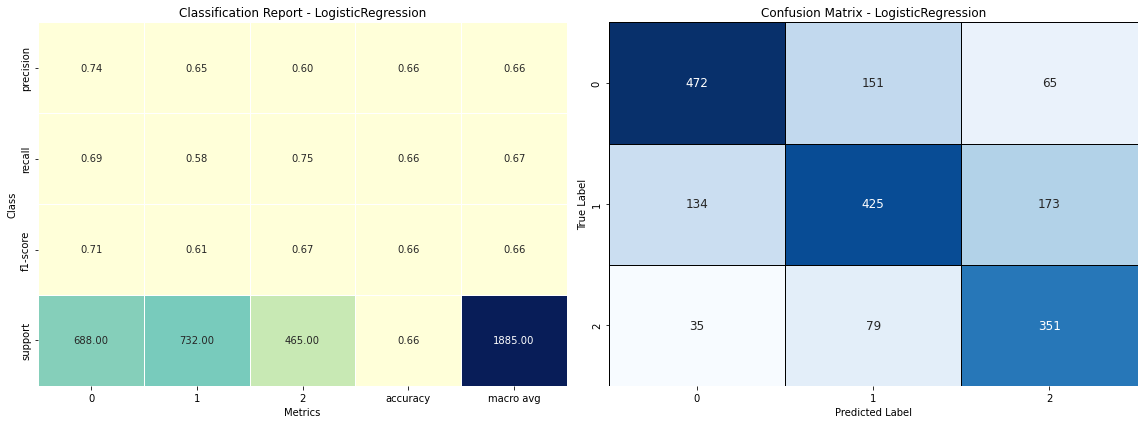

In [43]:
# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Fit the classifier to the resampled training data
logistic_regression.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_lr = logistic_regression.predict(X_test)

metrics(y_test, y_pred_lr, 'LogisticRegression', 'ROS')

## Random Forest:


Random Forest Classifier Accuracy with ROS: 0.70
Random Forest Classifier Balanced Accuracy with ROS: 0.70


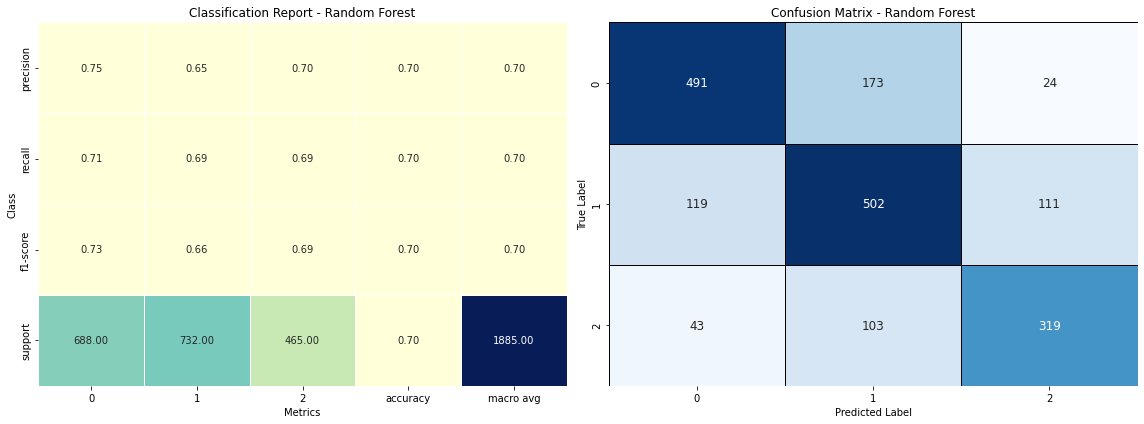

In [73]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the classifier to the resampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

metrics(y_test, y_pred_rf, 'Random Forest', 'ROS')

## XGBoost:


XGB Classifier Accuracy with ROS: 0.70
XGB Classifier Balanced Accuracy with ROS: 0.70


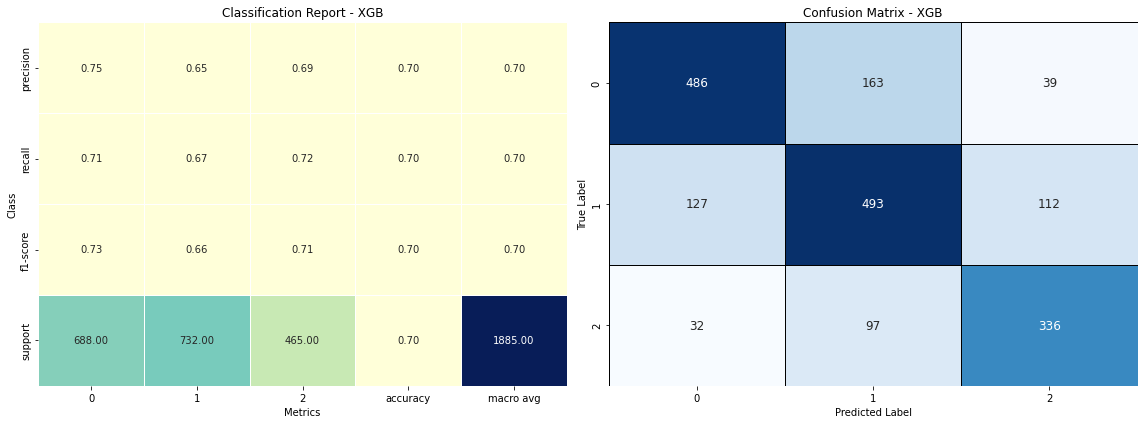

In [45]:
# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)  
# Fit the classifier to the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

metrics(y_test, y_pred_xgb, 'XGB', 'ROS')


## Decision Tree:


Decision Tree Classifier Accuracy with ROS: 0.56
Decision Tree Classifier Balanced Accuracy with ROS: 0.56


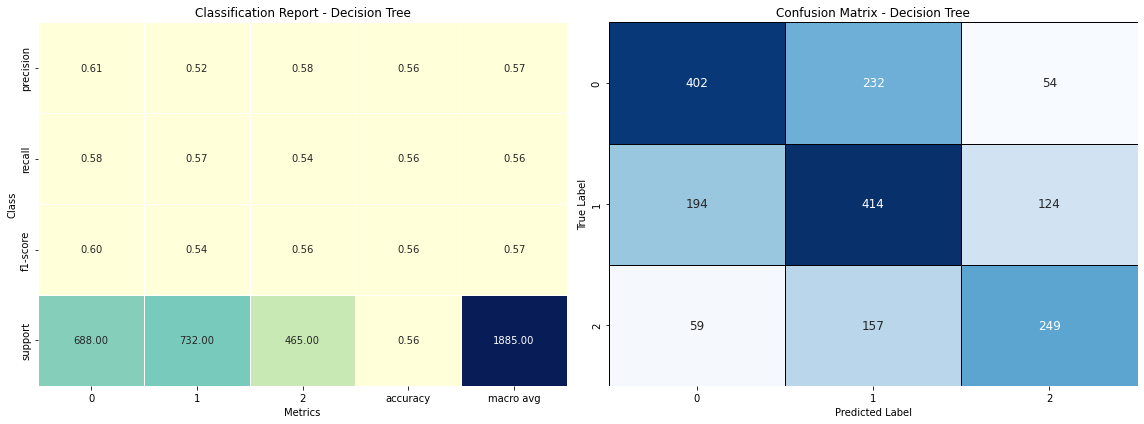

In [46]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the classifier to the resampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_dt = decision_tree.predict(X_test)

metrics(y_test, y_pred_dt, 'Decision Tree', 'ROS')

## NN:


Neural Network Classifier Accuracy with ROS: 0.67
Neural Network Classifier Balanced Accuracy with ROS: 0.69


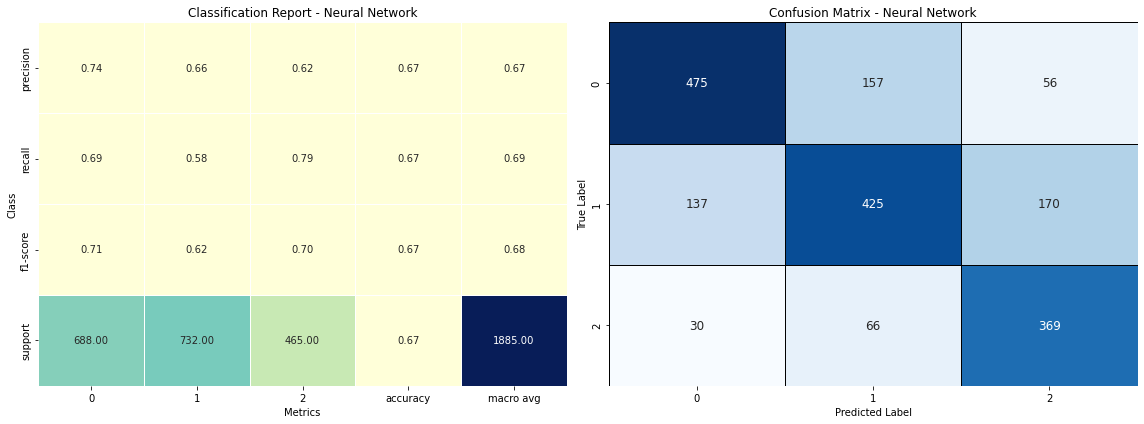

In [47]:
# Create a Neural Network classifier
neural_network = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Fit the classifier to the resampled training data
neural_network.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_nn = neural_network.predict(X_test)

metrics(y_test, y_pred_nn, 'Neural Network', 'ROS')


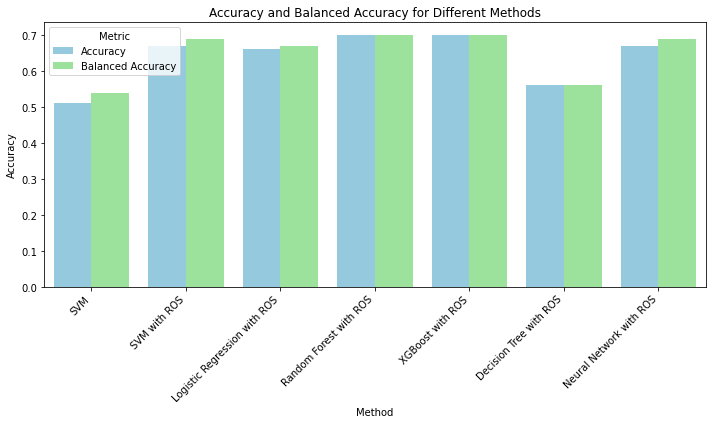

In [21]:
# Replace these lists with the accuracy and balanced accuracy values obtained for each method
methods = ['SVM', 'SVM with ROS', 'Logistic Regression with ROS', 'Random Forest with ROS', 'XGBoost with ROS', 'Decision Tree with ROS', 'Neural Network with ROS']
accuracy_values = [0.51, 0.67, 0.66, 0.70, 0.70, 0.56, 0.67]
balanced_accuracy_values = [0.54, 0.69, 0.67, 0.70, 0.70, 0.56, 0.69]

# Create a DataFrame to store the accuracy values for each method
data = pd.DataFrame({'Method': methods, 'Accuracy': accuracy_values, 'Metric': 'Accuracy'})
data_balanced = pd.DataFrame({'Method': methods, 'Accuracy': balanced_accuracy_values, 'Metric': 'Balanced Accuracy'})
data_combined = pd.concat([data, data_balanced], axis=0)

# Define a custom color palette for each metric
colors = {'Accuracy': 'skyblue', 'Balanced Accuracy': 'lightgreen'}

# Create a grouped bar plot using Seaborn to visualize the accuracy and balanced accuracy for each method
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Accuracy', hue='Metric', data=data_combined, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy and Balanced Accuracy for Different Methods')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## RandomizedSearchCV with Random Forest

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced_subsample', 'bootstrap': False}

Random Forest Classifier Accuracy with ROS: 0.70
Random Forest Classifier Balanced Accuracy with ROS: 0.69


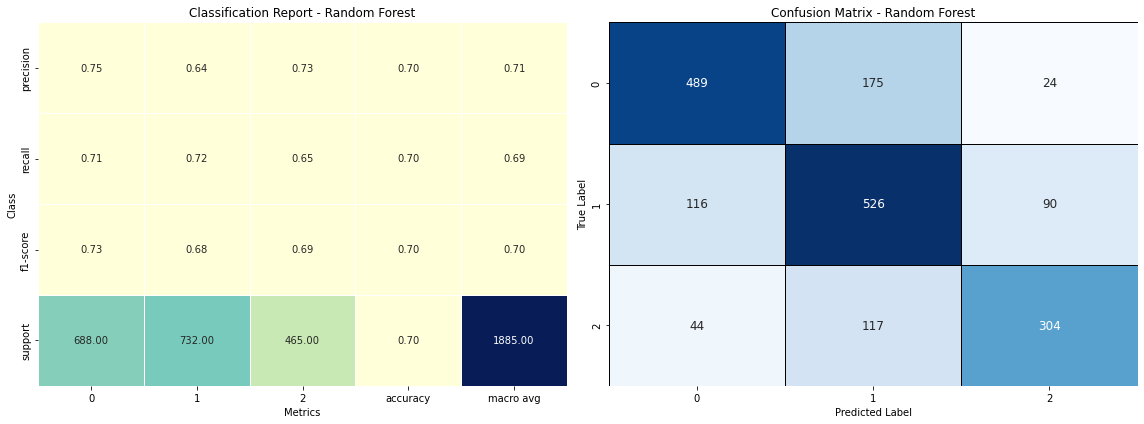

In [48]:
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create StratifiedKFold instance for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearchCV instance with cross-validation
randomized_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=50, cv=cv,
                                       scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the resampled training data
randomized_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = randomized_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_random_forest = randomized_search.best_estimator_
y_pred_best_rf = best_random_forest.predict(X_test)

metrics(y_test, y_pred_best_rf, 'Random Forest', 'ROS')

## Learning Curves:
### Are we overfitting??

In [74]:
def plot_learning_curves(estimator, X, y, train_sizes, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves")
    plt.xlabel("Training Examples")
    plt.ylabel(scoring.capitalize())

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring.capitalize())
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation " + scoring.capitalize())

    plt.legend(loc="best")
    plt.show()

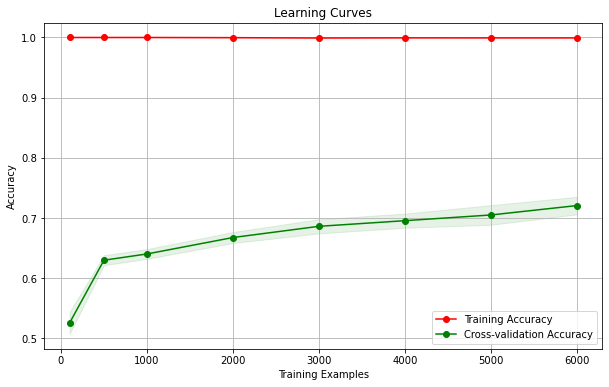

In [75]:
#Best model for now 
plot_learning_curves(random_forest, X_train_resampled, y_train_resampled, train_sizes=[100, 500, 1000, 2000, 3000, 4000, 5000, 6000],
                     cv=cv, scoring='accuracy')

Yes, we are overfitting, so now we will try to adjust hyperparameters like *max_depth*, *min_samples_split*, or *min_samples_leaf* to limit the model's complexity and prevent overfitting.

Cross-Validation Scores:
Mean Balanced Accuracy: 0.72
Standard Deviation: 0.02

Random Forest Classifier Accuracy with ROS: 0.69
Random Forest Classifier Balanced Accuracy with ROS: 0.69


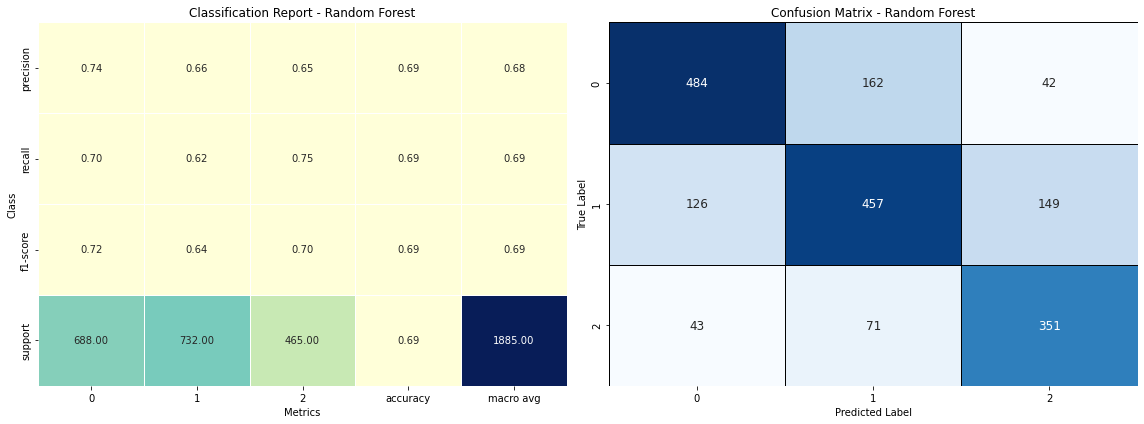

In [76]:
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, min_samples_split=5)

# Perform cross-validation to assess model performance
cv_scores = cross_val_score(random_forest, X_train_resampled, y_train_resampled, cv=5, scoring='balanced_accuracy')

# Print mean and standard deviation of cross-validation scores
print("Cross-Validation Scores:")
print(f"Mean Balanced Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

# Fit the classifier on the resampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

metrics(y_test, y_pred_rf, 'Random Forest', 'ROS')


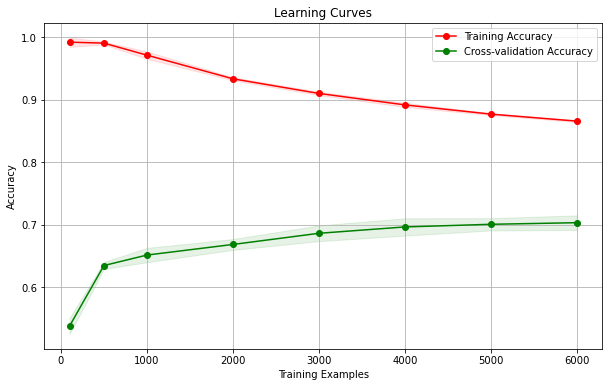

In [77]:
plot_learning_curves(random_forest, X_train_resampled, y_train_resampled, train_sizes=[100, 500, 1000, 2000, 3000, 4000, 5000, 6000],
                     cv=cv, scoring='accuracy')

Training accuracy has decreased, indicating that the model is not overfitting as much as before!!

## Interpretability

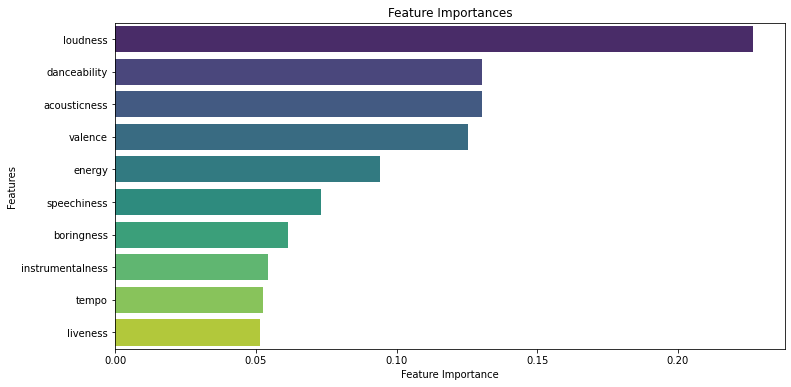

In [78]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the corresponding features
feature_names = np.array(df.drop(['track_uri', 'track_name','decade','predicted_decade','cluster','key','mode'], axis=1).columns)[sorted_indices]

feature_importances_df = pd.DataFrame({"Feature": feature_names, "Importance": sorted_feature_importances})
# Plot feature importances using Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()